In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install python-docx

In [3]:
import os
import re
import nltk

import string



import warnings
warnings.filterwarnings ('ignore')



In [4]:
import os

# Get the path to the resumes folder
path ="C:\\Users\\user\\Downloads\\Data Science\\Resumes-20230901T040204Z-001\\Resumes"

# Get a list of all the files and folders in the resumes folder
all_items = os.listdir(path)

# Filter for folders
folders = [item for item in all_items if os.path.isdir(os.path.join(path, item))]

# Print the names of the folders
for folder in folders:
    print(folder)

Peoplesoft resumes
React js
SQL Developer Lightning insight
workday resumes


In [5]:
# Iterate over the folders
for folder in folders:

    # Get a list of all the files in the folder
    files = os.listdir(os.path.join(path, folder))

    # Print the names of the files
    for file in files:
        all_files=print(os.path.join(folder, file))

Peoplesoft resumes\Peoplesoft Admin_AnubhavSingh.docx
Peoplesoft resumes\Peoplesoft Admin_G Ananda Rayudu.doc
Peoplesoft resumes\Peoplesoft Admin_Gangareddy.doc
Peoplesoft resumes\Peoplesoft Admin_Murali.docx
Peoplesoft resumes\Peoplesoft Admin_Priyanka Ramadoss.doc
Peoplesoft resumes\Peoplesoft Admin_SirazuddinMohammad.docx
Peoplesoft resumes\Peoplesoft Admin_srinivasarao.doc
Peoplesoft resumes\Peoplesoft Admin_Varkala Vikas.docx
Peoplesoft resumes\Peoplesoft Admin_Vinod Akkala.doc
Peoplesoft resumes\PeopleSoft DBA_Ganesh Alladi.doc
Peoplesoft resumes\PeopleSoft DBA_Vivekanand Sayana.docx
Peoplesoft resumes\Peoplesoft Finance_Arun Venu.doc
Peoplesoft resumes\Peoplesoft Finance_Pritam Biswas.doc
Peoplesoft resumes\Peoplesoft Finance_Rahul Ahuja.doc
Peoplesoft resumes\Peoplesoft FSCM_HariNarayana.docx
Peoplesoft resumes\Peoplesoft FSCM_Murali.docx
Peoplesoft resumes\Peoplesoft FSCM_PriyabrataHota.docx
Peoplesoft resumes\Peoplesoft FSCM_R Ahmed.doc
Peoplesoft resumes\Peoplesoft FSCM_SUJA

In [6]:
!pip install PyPDF2

In [7]:
pip install docx2txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import pandas as pd
import docx2txt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import win32com.client
import PyPDF2
from docx import Document


import warnings
warnings.filterwarnings ('ignore')

In [9]:
# Define the directory path\
directory = "C:\\Users\\user\\Downloads\\Data Science\\Resumes-20230901T040204Z-001\\Resumes"

# Initialize empty lists to store data
categories = []
resumes = []

# Create a COM object to interact with Word
word = win32com.client.Dispatch("Word.Application")
word.Visible = False  # Hide the Word application window

# Walk through the directory and its subfolders
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith((".doc", ".docx", ".pdf")):
            # Get the category (subfolder name)
            category = os.path.basename(root)
            
            # Get the full path to the file
            file_path = os.path.join(root, filename)
            
            # Read .docx files
            if filename.endswith(".docx"):
                doc = Document(file_path)
                text = "\n".join([para.text for para in doc.paragraphs])
            
            # Read .doc files
            elif filename.endswith(".doc"):
                doc = word.Documents.Open(file_path)
                text = doc.Content.Text
                doc.Close()
            
            # Read .pdf files
            elif filename.endswith(".pdf"):
                pdf_text = ""
                with open(file_path, "rb") as pdf_file:
                    pdf_reader = PyPDF2.PdfReader(pdf_file)
                    for page_num in range(len(pdf_reader.pages)):
                        page = pdf_reader.pages[page_num]
                        pdf_text += page.extract_text()
                
                text = pdf_text
            
            # Append data to the lists
            categories.append(category)
            resumes.append(text)

# Close the Word application
word.Quit()

# Create a DataFrame
df = pd.DataFrame({'Category': categories, 'Resume': resumes})

# Display the DataFrame
print(df)

              Category                                             Resume
0   Peoplesoft resumes    Anubhav Kumar Singh\t\t\n\n  To work in a gl...
1   Peoplesoft resumes  \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2   Peoplesoft resumes  PeopleSoft Database Administrator\r           ...
3   Peoplesoft resumes  Murali\n\nExperience Summary \n\nI have 6 year...
4   Peoplesoft resumes  Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...
..                 ...                                                ...
74     workday resumes  \tWorkday Integration Consultant\r\rName      ...
75     workday resumes  Seeking suitable positions in Workday HCM  as ...
76     workday resumes  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...
77     workday resumes  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
78     workday resumes                                                ...

[79 rows x 2 columns]


In [10]:
df

,Category,Resume
0,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n\n To work in a gl...
1,Peoplesoft resumes,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,Peoplesoft resumes,PeopleSoft Database Administrator\r ...
3,Peoplesoft resumes,Murali\n\nExperience Summary \n\nI have 6 year...
4,Peoplesoft resumes,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
74,workday resumes,\tWorkday Integration Consultant\r\rName ...
75,workday resumes,Seeking suitable positions in Workday HCM as ...
76,workday resumes,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...
77,workday resumes,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [11]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  79 non-null     object
 1   Resume    79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [13]:
df.shape

(79, 2)

In [14]:
df['Category'].unique()

array(['Peoplesoft resumes', 'React js',
       'SQL Developer Lightning insight', 'workday resumes'], dtype=object)

In [15]:
#Number of Words in single tweet
df['word_count'] = df['Resume'].apply(lambda x: len(str(x).split(" ")))
df[['Resume','word_count']].head()

,Resume,word_count
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,978
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431
2,PeopleSoft Database Administrator\r ...,1346
3,Murali\n\nExperience Summary \n\nI have 6 year...,494
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670


In [16]:
df.head()

,Category,Resume,word_count
0,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n\n To work in a gl...,978
1,Peoplesoft resumes,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,1431
2,Peoplesoft resumes,PeopleSoft Database Administrator\r ...,1346
3,Peoplesoft resumes,Murali\n\nExperience Summary \n\nI have 6 year...,494
4,Peoplesoft resumes,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",670


Normalization

In [17]:
#let is convert our data into lower case:
df['Resume'] = df['Resume'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Resume'].head()

0    anubhav kumar singh to work in a globally comp...
1    profile summary: 7+ years of experience in imp...
2    peoplesoft database administrator gangareddy p...
3    murali experience summary i have 6 years of ex...
4    priyanka ramadoss 61/46, mountpleasant, coonoo...
Name: Resume, dtype: object

Removing Punctuations

In [18]:
#Remove punctuations
df['Resume'] = df['Resume'].str.replace('[^\w\s]','')
df['Resume'].head()

0    anubhav kumar singh to work in a globally comp...
1    profile summary 7 years of experience in imple...
2    peoplesoft database administrator gangareddy p...
3    murali experience summary i have 6 years of ex...
4    priyanka ramadoss 6146 mountpleasant coonoor t...
Name: Resume, dtype: object

Removing stop words

In [19]:
from gensim.parsing.preprocessing import remove_stopwords

# Apply remove_stopwords function to the 'Resume' column
df['Resume'] = df['Resume'].apply(remove_stopwords)

# Display the modified 'Resume' column
df['Resume'].head()

0    anubhav kumar singh work globally competitive ...
1    profile summary 7 years experience implementin...
2    peoplesoft database administrator gangareddy p...
3    murali experience summary 6 years experience w...
4    priyanka ramadoss 6146 mountpleasant coonoor n...
Name: Resume, dtype: object

Removing High frequency and low frequency words

In [20]:
freq = pd.Series(' '.join(df['Resume']).split()).value_counts()[:10]
freq

experience     574
peoplesoft     430
application    394
workday        387
server         327
data           318
reports        316
project        289
business       260
process        230
dtype: int64

In [21]:
freq = list(freq.index)
df['Resume'] = df['Resume'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Resume'].head()

0    anubhav kumar singh work globally competitive ...
1    profile summary 7 years implementing upgrading...
2    database administrator gangareddy professional...
3    murali summary 6 years working administration ...
4    priyanka ramadoss 6146 mountpleasant coonoor n...
Name: Resume, dtype: object

In [22]:
#remove rare words
freq = pd.Series(' '.join(df['Resume']).split()).value_counts()[-10:]
freq

optimally         1
gaming            1
pc                1
typescript        1
methodolgy        1
honest            1
communicator      1
focused           1
clientcustomer    1
challenge         1
dtype: int64

In [23]:
freq = list(freq.index)
df['Resume'] = df['Resume'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Resume'].head()

0    anubhav kumar singh work globally competitive ...
1    profile summary 7 years implementing upgrading...
2    database administrator gangareddy professional...
3    murali summary 6 years working administration ...
4    priyanka ramadoss 6146 mountpleasant coonoor n...
Name: Resume, dtype: object

Spelling correction

In [24]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [25]:
from textblob import TextBlob

In [26]:
df['Resume'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    anubhav human sigh work locally competitive en...
1    profile summary 7 years implementing upbraidin...
2    database administrator gangareddy professional...
3    murat summary 6 years working administration p...
4    priyanka ramadoss 6146 mountpleasant coonoor n...
Name: Resume, dtype: object

TOKENIZATION

In [27]:
from gensim.utils import tokenize

# Tokenize each resume and store the tokens in a new column 'Tokens'
df['Resume'].apply(lambda x: list(tokenize(x)))

# Display the 'Tokens' column
df['Resume'].head()

0    anubhav kumar singh work globally competitive ...
1    profile summary 7 years implementing upgrading...
2    database administrator gangareddy professional...
3    murali summary 6 years working administration ...
4    priyanka ramadoss 6146 mountpleasant coonoor n...
Name: Resume, dtype: object

In [28]:
df.head()

,Category,Resume,word_count
0,Peoplesoft resumes,anubhav kumar singh work globally competitive ...,978
1,Peoplesoft resumes,profile summary 7 years implementing upgrading...,1431
2,Peoplesoft resumes,database administrator gangareddy professional...,1346
3,Peoplesoft resumes,murali summary 6 years working administration ...,494
4,Peoplesoft resumes,priyanka ramadoss 6146 mountpleasant coonoor n...,670


STEMMING

In [29]:
from gensim.parsing.preprocessing import stem_text

# Apply stemming to the 'Resume' column
df['Resume'].apply(stem_text)

# Display the 'Stemmed_Resume' column
df['Resume'].head()

0    anubhav kumar singh work globally competitive ...
1    profile summary 7 years implementing upgrading...
2    database administrator gangareddy professional...
3    murali summary 6 years working administration ...
4    priyanka ramadoss 6146 mountpleasant coonoor n...
Name: Resume, dtype: object

LEMMATIZATION

In [30]:
#from pattern.en import parse
#from pattern.en import pprint


FEATURE EXTRACTION

In [31]:
#Count vectorizer tells the frequency of a word

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [33]:
vectorizer=CountVectorizer(min_df=2, max_df=20)
X=vectorizer.fit_transform(df['Resume'])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names_out(), 'occurences':np.asarray(X.sum(axis=0)).ravel().tolist()})

In [34]:
word_freq_df['frequency']=word_freq_df['occurences']/np.sum(word_freq_df['occurences'])
word_freq_df.tail(30)

#web word is coming 68 times in the whole corpus.

,term,occurences,frequency
2024,wireless,8,0.000461
2025,wizard,3,0.000173
2026,word,5,0.000288
2027,workbooks,2,0.000115
2028,workdays,2,0.000115
2029,worker,34,0.001958
2030,workers,8,0.000461
2031,workflow,19,0.001094
2032,workflows,4,0.000230
2033,workforce,2,0.000115


N-GRAM

In [35]:
    #by n-gram we can take the combination of words.
#Let us define a function for n-gram

In [36]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [37]:
top2_words = get_top_n2_words(df["Resume"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,people tools,73
1,react js,68
2,calculated fields,66
3,till date,61
4,good knowledge,54
5,report writer,48
6,integration broker,46
7,technical skills,45
8,core connector,41
9,web services,40


[Text(0, 0, 'people tools'),
 Text(1, 0, 'react js'),
 Text(2, 0, 'calculated fields'),
 Text(3, 0, 'till date'),
 Text(4, 0, 'good knowledge'),
 Text(5, 0, 'report writer'),
 Text(6, 0, 'integration broker'),
 Text(7, 0, 'technical skills'),
 Text(8, 0, 'core connector'),
 Text(9, 0, 'web services'),
 Text(10, 0, 'scheduler servers'),
 Text(11, 0, 'change assistant'),
 Text(12, 0, 'roles responsibilities'),
 Text(13, 0, 'domains scheduler'),
 Text(14, 0, 'power bi'),
 Text(15, 0, 'document transformation'),
 Text(16, 0, 'stored procedures'),
 Text(17, 0, 'servers web'),
 Text(18, 0, 'production support'),
 Text(19, 0, 'professional summary')]

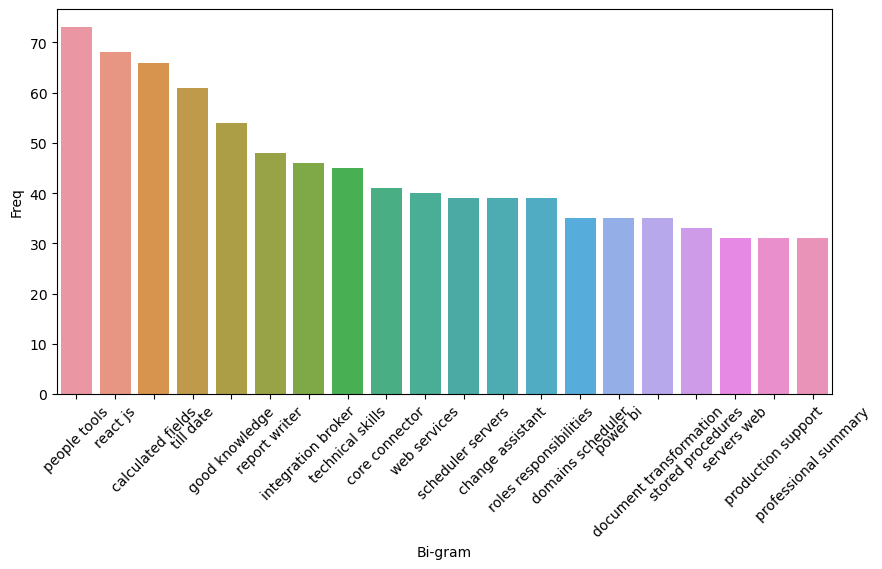

In [38]:
#Bi-gram plot fro top 20 words
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

WORD CLOUD

In [39]:
#what ever word is coming maximum times in our corpus, the font of that word is very big

In [40]:
string_Total = " ".join(df["Resume"])

In [41]:
#pip install wordcloud


In [42]:
#wordcloud for entire corpus
#from wordcloud import WordCloud
#wordcloud_stw = WordCloud(
#                background_color= 'black',
#                width = 8000,
 ##               height = 8000
   #             ).generate(string_Total)
#plt.imshow(wordcloud_stw)

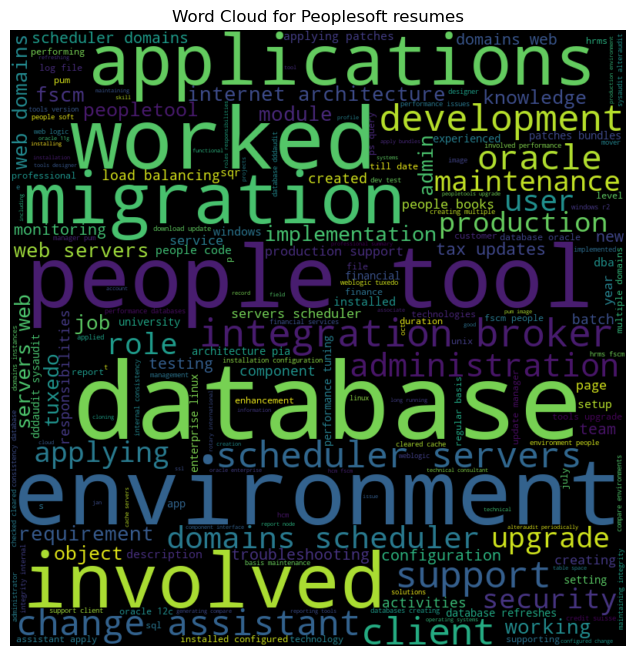

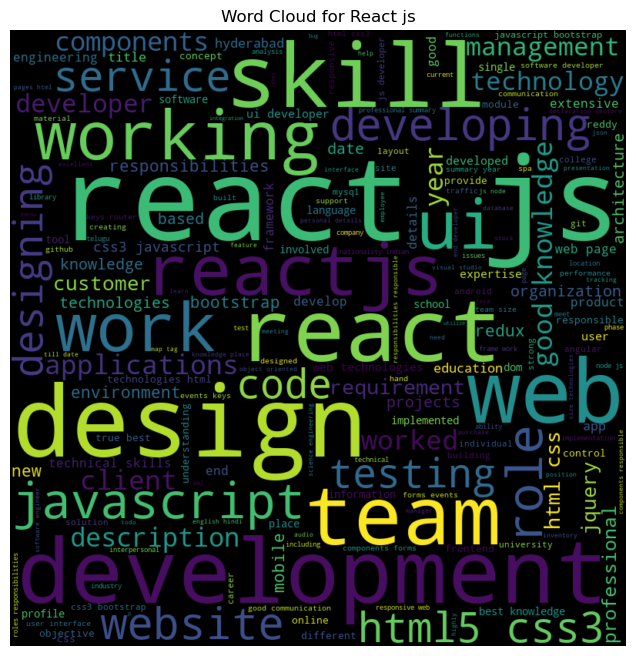

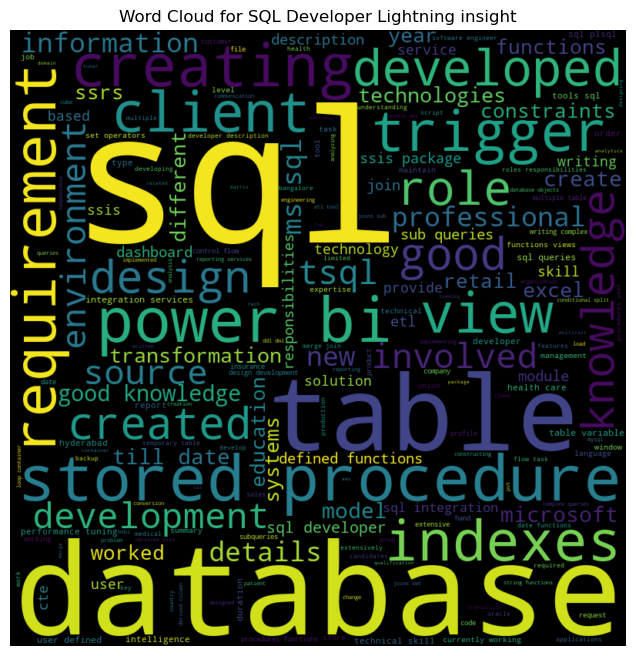

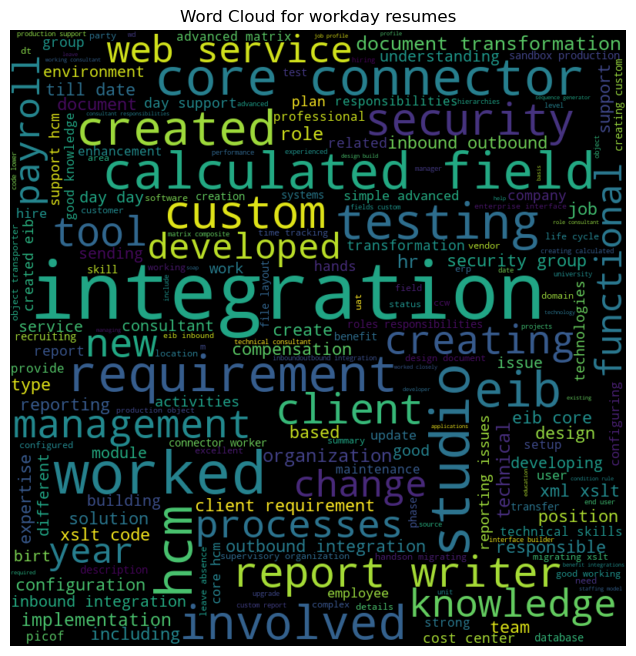

Category-wise word frequencies saved to 'category_word_frequencies.pkl'


In [85]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle

# Assuming you have a DataFrame 'df' with columns 'Resume' and 'Category'

# Split the data into categories
categories = df['Category'].unique()

# Create a dictionary to store category-wise word frequencies
category_word_frequencies = {}

# Create word clouds for each category
for category in categories:
    # Concatenate all resumes in the same category
    category_text = " ".join(df[df['Category'] == category]['Resume'])
    
    # Create a word cloud for the category
    wordcloud = WordCloud(
        background_color='black',
        width=800,
        height=800
    ).generate(category_text)
    
    # Get word frequencies from the word cloud
    word_frequencies = wordcloud.process_text(category_text)
    
    # Store word frequencies in the dictionary
    category_word_frequencies[category] = word_frequencies

# Save the dictionary to a .pkl file
with open("category_word_frequencies.pkl", "wb") as f:
    pickle.dump(category_word_frequencies, f)

# Plot the word clouds (optional)
for category in categories:
    wordcloud = WordCloud(
        background_color='black',
        width=800,
        height=800
    ).generate_from_frequencies(category_word_frequencies[category])
    
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis("off")
    plt.show()

print("Category-wise word frequencies saved to 'category_word_frequencies.pkl'")


# MODEL BUILDING

TFIDF Vectorization

In [43]:
#we are converting our data into datastructure

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english', max_features=10000, max_df=10, smooth_idf=True)
doc_vec=vectorizer.fit_transform(df['Resume'])
names_features=vectorizer.get_feature_names_out()
dense=doc_vec.todense()
denselist=dense.tolist()
data=pd.DataFrame(denselist, columns=names_features)
data

,012019,022019,032012,032014,032018,032019,032020,032021,04,04111995,...,youre,yoursincerely,yrs,zealand,zenefits,zero,zones,zp,ﬁnding,ﬁts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.057542,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df.head(3)

,Category,Resume,word_count
0,Peoplesoft resumes,anubhav kumar singh work globally competitive ...,978
1,Peoplesoft resumes,profile summary 7 years implementing upgrading...,1431
2,Peoplesoft resumes,database administrator gangareddy professional...,1346


In [47]:
x = df['Resume'].values
y = df['Category'].values

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25)
x_train.shape, x_test.shape

((59,), (20,))

In [49]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [50]:
x_train.shape, x_test.shape

((59, 3991), (20, 3991))

In [51]:
print(y_train),print(y_test)

['React js' 'React js' 'SQL Developer Lightning insight' 'workday resumes'
 'React js' 'workday resumes' 'Peoplesoft resumes' 'Peoplesoft resumes'
 'React js' 'workday resumes' 'React js' 'Peoplesoft resumes' 'React js'
 'SQL Developer Lightning insight' 'workday resumes'
 'SQL Developer Lightning insight' 'workday resumes' 'Peoplesoft resumes'
 'React js' 'Peoplesoft resumes' 'workday resumes' 'React js'
 'Peoplesoft resumes' 'SQL Developer Lightning insight'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'workday resumes'
 'workday resumes' 'SQL Developer Lightning insight' 'React js' 'React js'
 'React js' 'React js' 'workday resumes' 'workday resumes'
 'workday resumes' 'Peoplesoft resumes' 'React js' 'Peoplesoft resumes'
 'workday resumes' 'React js' 'workday resumes' 'React js'
 'Peoplesoft resumes' 'workday resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'SQL Developer Lightning insight'
 'SQL Developer Lightning insight' 'Peoplesoft resumes' 'workday r

(None, None)

# Classification Model

#1. KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [53]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.40
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.50      0.17      0.25         6
                       React js       1.00      0.67      0.80         6
SQL Developer Lightning insight       0.00      0.00      0.00         5
                workday resumes       0.21      1.00      0.35         3

                       accuracy                           0.40        20
                      macro avg       0.43      0.46      0.35        20
                   weighted avg       0.48      0.40      0.37        20




2. AdaBoost Classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

In [55]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.65
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.67      0.80         6
                       React js       0.46      1.00      0.63         6
SQL Developer Lightning insight       1.00      0.60      0.75         5
                workday resumes       0.00      0.00      0.00         3

                       accuracy                           0.65        20
                      macro avg       0.62      0.57      0.55        20
                   weighted avg       0.69      0.65      0.62        20




3. Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [57]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_DT, x_train, y_train, cv = kfold)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.60
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.80      0.67      0.73         6
                       React js       0.50      0.33      0.40         6
SQL Developer Lightning insight       1.00      0.60      0.75         5
                workday resumes       0.38      1.00      0.55         3

                       accuracy                           0.60        20
                      macro avg       0.67      0.65      0.61        20
                   weighted avg       0.70      0.60      0.61        20




4. Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_RF, x_train, y_train, cv = kfold)

precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.83      0.91         6
                       React js       0.75      1.00      0.86         6
SQL Developer Lightning insight       1.00      0.80      0.89         5
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           0.90        20
                      macro avg       0.94      0.91      0.91        20
                   weighted avg       0.93      0.90      0.90        20




5. Support Vectore Machine (SVM) Classifier

In [60]:
from sklearn.svm import SVC

In [61]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_svm, x_train, y_train, cv = kfold)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.75
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.83      0.91         6
                       React js       0.67      1.00      0.80         6
SQL Developer Lightning insight       1.00      0.20      0.33         5
                workday resumes       0.60      1.00      0.75         3

                       accuracy                           0.75        20
                      macro avg       0.82      0.76      0.70        20
                   weighted avg       0.84      0.75      0.71        20




6 Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_lgr, x_train, y_train, cv = kfold)

precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.83      0.91         6
                       React js       0.75      1.00      0.86         6
SQL Developer Lightning insight       1.00      0.60      0.75         5
                workday resumes       0.75      1.00      0.86         3

                       accuracy                           0.85        20
                      macro avg       0.88      0.86      0.84        20
                   weighted avg       0.89      0.85      0.85        20




7. Bagging Classifier

In [64]:
from sklearn.ensemble import BaggingClassifier

In [65]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_bagg, x_train, y_train, cv = kfold)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.69
Accuracy of  test set    : 0.60
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       0.43      1.00      0.60         6
                       React js       1.00      0.17      0.29         6
SQL Developer Lightning insight       1.00      0.40      0.57         5
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           0.60        20
                      macro avg       0.86      0.64      0.61        20
                   weighted avg       0.83      0.60      0.56        20




8. Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_GradientBoost, x_train, y_train, cv = kfold)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.67      0.80         6
                       React js       0.67      1.00      0.80         6
SQL Developer Lightning insight       1.00      0.80      0.89         5
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           0.85        20
                      macro avg       0.92      0.87      0.87        20
                   weighted avg       0.90      0.85      0.85        20




XG BOOST

In [68]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [69]:
import xgboost as xgb

In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create a LabelEncoder instance and encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create the XGBoost classifier
model_xgboost = xgb.XGBClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],              # Maximum depth of each tree
    'min_child_weight': [1, 2, 3],      # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 0.9],       # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.7, 0.8, 0.9] # Fraction of features used for fitting the trees
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=model_xgboost, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train_encoded)

# Print the best hyperparameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

# Get the best model
best_xgboost_model = grid_search.best_estimator_

Best Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
Best Accuracy: 0.88


In [70]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and train the XGBoost classifier
model_xgboost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model_xgboost.fit(x_train, y_train_encoded)

# Make predictions on the test set
y_pred_xgboost_encoded = model_xgboost.predict(x_test)

# Convert predicted labels back to original string labels
y_pred_xgboost = label_encoder.inverse_transform(y_pred_xgboost_encoded)

# Now, calculate various evaluation metrics
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = round(precision_score(y_test, y_pred_xgboost, average='macro'), 2)
recall_xgboost = round(recall_score(y_test, y_pred_xgboost, average='macro'), 2)
f1_xgboost = round(f1_score(y_test, y_pred_xgboost, average='macro'), 2)

# Print the evaluation results
print('Accuracy of training set: {:.2f}'.format(model_xgboost.score(x_train, y_train_encoded)))
print('Accuracy of test set: {:.2f}'.format(accuracy_xgboost))
print("Classification report for classifier %s:\n%s\n" % (model_xgboost, classification_report(y_test, y_pred_xgboost)))




Accuracy of training set: 1.00
Accuracy of test set: 0.85
Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.67      0.80      

9 Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_NB, x_train, y_train, cv = kfold)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      1.00      1.00         6
                       React js       1.00      1.00      1.00         6
SQL Developer Lightning insight       1.00      1.00      1.00         5
                workday resumes       1.00      1.00      1.00         3

                       accuracy                           1.00        20
                      macro avg       1.00      1.00      1.00        20
                   weighted avg       1.00      1.00      1.00        20




# Model Evaluation

In [73]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier", "Xg Boost Classifier"],
              "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                   model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train), model_xgboost.score(x_train, y_train_encoded)],  # Remove the parentheses here
              "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB, accuracy_xgboost],
              "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB, precision_xgboost],
              "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB, recall_xgboost],
              "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB, f1_xgboost]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.694915,0.40,0.43,0.46,0.35
1,DecisionTree Classifier,1.000000,0.60,0.67,0.65,0.61
2,RandomForest Classifier,1.000000,0.90,0.94,0.91,0.91
3,SVM Classifier,1.000000,0.75,0.82,0.76,0.70
4,Logistic Regression,1.000000,0.85,0.88,0.86,0.84
5,Bagging Classifier,0.694915,0.60,0.86,0.64,0.61
6,AdaBoost Classifier,0.694915,0.65,0.62,0.57,0.55
7,Gradient Boosting Classifier,1.000000,0.85,0.92,0.87,0.87
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00
9,Xg Boost Classifier,1.000000,0.85,0.86,0.88,0.84


# FINAL MODEL

In [81]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming your dataset has a 'text' column containing text data and a 'label' column containing labels.
x = df['Resume']
y = df['Category']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit and transform the text data
x_tfidf = tfidf_vectorizer.fit_transform(x)

# Create a LabelEncoder instance for the target variable
label_encoder = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Create and train the XGBoost classifier
finalmodel_xgboost = XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 3, min_child_weight= 1, n_estimators=100, subsample=0.7)
finalmodel_xgboost.fit(x_tfidf, y_encoded)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Prediction

In [92]:
import pickle

# Load the category_word_frequencies dictionary from the pickle file
with open("category_word_frequencies.pkl", "rb") as f:
    category_word_frequencies = pickle.load(f)

# Input text for prediction
input_text = "sql database"

# Preprocess the input text (you may need to customize this based on your preprocessing steps)
input_text = input_text.lower().split()  # Convert to lowercase and tokenize

# Calculate word frequencies for the input text
input_word_frequencies = dict((word, input_text.count(word)) for word in set(input_text))

# Compare input word frequencies with category word frequencies
best_category = None
best_similarity = 0

for category, category_word_freqs in category_word_frequencies.items():
    # Calculate Jaccard similarity (or any similarity metric you prefer)
    intersection = set(input_word_frequencies.keys()) & set(category_word_freqs.keys())
    union = set(input_word_frequencies.keys()) | set(category_word_freqs.keys())
    similarity = len(intersection) / len(union)
    
    # Update best category if the current category has higher similarity
    if similarity > best_similarity:
        best_similarity = similarity
        best_category = category

# The 'best_category' variable now contains the predicted category label
print("Predicted Category:", best_category)


Predicted Category: SQL Developer Lightning insight


# DEPLOYMENT

In [82]:
import pickle
filename = 'finalmodel_xgboost.pkl'
pickle.dump(finalmodel_xgboost,open(filename,'wb'))

In [77]:
filename = 'vector.pkl'
pickle.dump(tfidf_vectorizer,open(filename,'wb'))